In [116]:
import pandas as pd

In [229]:
titanic = pd.read_csv("titanic_train.csv")

In [118]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [120]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [121]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

In [122]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [123]:
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

In [125]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [126]:
alg = LinearRegression()

In [127]:
kf = KFold(titanic.shape[0], n_folds = 3, random_state = 1)

In [128]:
predictions = []

In [129]:
for train, test in kf:
    train_predictors = (titanic[predictors].iloc[train, :])
    train_target = titanic["Survived"].iloc[train]
    alg.fit(train_predictors, train_target)
    test_predictions = alg.predict(titanic[predictors].iloc[test, :])
    predictions.append(test_predictions)

In [130]:
import numpy as np

In [131]:
predictions = np.concatenate(predictions, axis = 0)
#the predictions were in 3 separate numpy arrays

In [132]:
predictions[predictions > 0.5] = 1
predictions[predictions < 0.5] = 0

In [133]:
accuracy = sum(predictions[predictions == titanic["Survived"]])/ len(predictions)
# as for kaggle

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
accuracy = accuracy_score(predictions, titanic["Survived"])
print(accuracy)

0.783389450056


In [136]:
########################################################################################################################

In [137]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

In [138]:
alg = LogisticRegression(random_state = 1)

In [139]:
#X = diabetes.data[:150]         
#y = diabetes.target[:150]
#lasso = linear_model.Lasso()   
#print(cross_val_score(lasso, X, y))   
#[ 0.33150734  0.08022311  0.03531764]
# cv = 3  integer, to specify the number of folds in a (Stratified)KFold,
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = 3)

In [140]:
print(scores.mean())

0.787878787879


In [141]:
# now on test-data for LogisticRegression

In [142]:
titanic_test = pd.read_csv("titanic_test.csv")

In [143]:
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())

In [144]:
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

In [145]:
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1

In [146]:
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 2

In [147]:
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())

In [148]:
alg = LogisticRegression(random_state = 1)
alg.fit(titanic[predictors], titanic["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
predictions = alg.predict(titanic_test[predictors])

In [150]:
#submission = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived" : predictions})

In [151]:
#submission.to_csv("kag1.csv", index = False)

In [ ]:
# accuracy was around 75%

In [152]:
#use better alg
#generate better features
#combine multiple ml algs

In [153]:
########################################################################################################################

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
alg = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2, min_samples_leaf = 1)

In [156]:
#n_estimators = no of trees we want to make
#min_samples_split = min no of rows we need to make a split
#min_samples_leaf = min no of samples we can have at the place a tree branch ends(bottom points of tree)

In [157]:
kf = cross_validation.KFold(titanic.shape[0], n_folds = 3, random_state = 1)

In [158]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = kf)

In [159]:
print(scores.mean())

0.785634118967


In [160]:
# to improve accuracy , increase no of trees

In [161]:
alg = RandomForestClassifier(random_state = 1, n_estimators = 50, min_samples_split = 4, min_samples_leaf = 2)

In [162]:
kf = cross_validation.KFold(titanic.shape[0], n_folds = 3, random_state = 1)

In [163]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = kf)

In [164]:
print(scores.mean())

0.81593714927


In [165]:
# to improve accuracy, increase no of features

In [166]:
#1st new
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

In [167]:
#2nd new
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

In [168]:
#3rd new
import re

In [169]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [170]:
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Ms            1
Mme           1
Lady          1
Don           1
Countess      1
Capt          1
Jonkheer      1
Name: Name, dtype: int64


In [171]:
title_mapping = { "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle" : 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

In [172]:
# what?
#to verify whether we converted all
for k,v in title_mapping.items():
    titles[titles == k] = v

In [173]:
print(pd.value_counts(titles))

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [174]:
titanic["Titles"] = titles

In [175]:
#4th new
import operator

In [176]:
family_id_mapping = {}
#mapping family name to id

In [177]:
#what?
#creating unique family id
def get_family_id(row):
    last_name = row["Name"].split(",")[0]
#find the last name
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
#create family id
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            current_id = (max(family_id_mapping.items(), key = operator.itemgetter(1))[1] + 1)
            family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

In [231]:
#some error here

In [183]:
#5th new
#selecting k best features


In [184]:
from sklearn.feature_selection import SelectKBest, f_classif

In [191]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Titles", "NameLength"]

In [192]:
selector = SelectKBest(f_classif, k = 5)

In [193]:
selector.fit(titanic[predictors], titanic["Survived"])

SelectKBest(k=5, score_func=<function f_classif at 0x000002127BA76E18>)

In [194]:
scores = np.log10(selector.pvalues_)

In [198]:
import matplotlib.pyplot as plt

In [202]:
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors)

([<matplotlib.axis.XTick at 0x2127d8b5d68>,
 <a list of 10 Text xticklabel objects>)

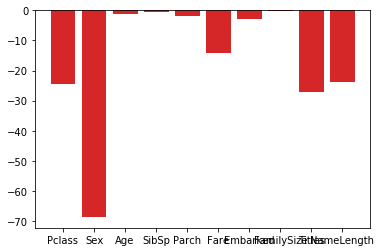

In [203]:
plt.show()

In [207]:
predictors = ["Pclass", "Sex","Fare", "Titles"]

In [208]:
alg = RandomForestClassifier(random_state = 1, n_estimators = 50, min_samples_split = 8, min_samples_leaf = 4)

In [209]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv = 3)

In [210]:
print(scores.mean())

0.817059483726


In [214]:
#6th new
#gradient boosting involves training decision trees one after another and feeding errors from one tree into next
#causes overfitting (usually with trees > 100)
#ensemble 
#logistic reg is used on linear predictors that have corr with Survived
#and gradient boosting on all predictors

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

In [216]:
algorithms = [[GradientBoostingClassifier(random_state = 1, n_estimators = 25, max_depth = 3), ["Pclass", "Sex", "Age","Fare","Embarked", "FamilySize", "Titles"]], [LogisticRegression(random_state = 1), ["Pclass", "Sex", "Fare", "FamilySize", "Titles", "Age", "Embarked"]]]

In [217]:
kf = KFold(titanic.shape[0], n_folds = 3, random_state = 1)

In [218]:
predictions = []

In [221]:
#what?
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train, :], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test, :].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1])/2
    test_predictions[test_predictions > 0.5] = 1
    test_predictions[test_predictions < 0.5] = 0
    predictions.append(test_predictions)


In [222]:
predictions = np.concatenate(predictions, axis = 0)

In [223]:
accuracy = sum(predictions[predictions == titanic["Survived"]])/len(predictions)

In [224]:
print(accuracy)

0.279461279461
